- Author: Anderson Banihirwe
    
- Project: Tensorflow Recipes

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/01-using-matrix-inverse-method.ipynb#Using-Inverse-Matrix-Method" data-toc-modified-id="Using-Inverse-Matrix-Method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using Inverse Matrix Method</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/01-using-matrix-inverse-method.ipynb#Generate-data" data-toc-modified-id="Generate-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate data</a></span></li><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/01-using-matrix-inverse-method.ipynb#Solve" data-toc-modified-id="Solve-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Solve</a></span></li></ul></li></ul></div>

# Using Inverse Matrix Method

- Linear Regression can be represented as a set of matrix equations, $Ax = b$
- We have to be careful if our observation matrix (design matrix) A is not square. The solution to solving x can be expressed as $x = (A^T A)^{-1}A^T b$


In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')

## Generate data


In [2]:
x_vals = np.linspace(0, 10, 200) #.reshape(200, 1)
y_vals = x_vals + np.random.normal(0, 1, 200)

In [3]:
# ones = np.ones(shape=(200, 1))

In [4]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 200)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))


In [5]:
# Turn A and B matrices into tensors
A_tsr = tf.constant(A)
b_tsr = tf.constant(b)

## Solve

In [6]:
tA_A       = tf.matmul(tf.transpose(A_tsr), A_tsr)
tA_A_inv   = tf.matrix_inverse(tA_A)
product    = tf.matmul(tA_A_inv, tf.transpose(A_tsr))
solution   = tf.matmul(product, b_tsr)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Slope:  1.0139123414146802
Y-intercept: -0.0931560161416781


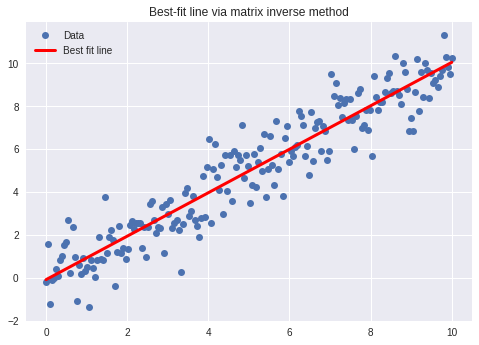

In [8]:
# start training
with tf.Session() as sess:
    sess.run(init)
    
    solution_eval = sess.run(solution)
    
    # Extract the coefficients from the solution,the slop and the y-intercept
    slope = solution_eval[0][0]
    y_intercept = solution_eval[1][0]
    
    print('Slope:  {}'.format(slope) )
    print('Y-intercept: {}'.format(y_intercept))
    
    best_fit = []
    for i in x_vals:
        best_fit.append(slope * i + y_intercept)
        
    plt.plot(x_vals, y_vals, 'o', label='Data')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Best-fit line via matrix inverse method')
    plt.show()
    
    

In [9]:
%load_ext version_information
%version_information tensorflow, numpy, matplotlib

Software versions
Python 3.6.2 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
tensorflow 1.3.0
numpy 1.12.1
matplotlib 2.0.2
Sun Sep 17 21:16:00 2017 CDT